In [2]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [14]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 88
    return state

In [15]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState) # Builder lets us define a graph

# Add nodes
builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)

# Add edges
builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

# Build the graph to display it
graph = builder.compile()


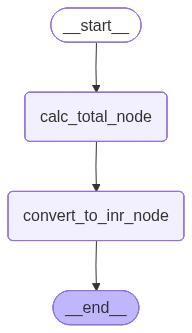

In [16]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 95040.0}

In [3]:
my_obj : PortfolioState = {
    'amount_usd': 100,
    'total_usd': 100,
    'total_inr': 34
}